# Author: HIMANSHU R

# SPARK FOUNDATION - Graduate Rotational Internship Program

# --------------------------------------------------------------------------------------------------------

# TASK: Predict the percentage of a student based on the no. of study hours

# --------------------------------------------------------------------------------------------------------

# Importing the required initial libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the given dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Validating the features of given dataset

a) Size of the dataset:

In [3]:
df.shape

(25, 2)

> This implies the given data set has 25 rows and 2 columns

b) Datatype of the fields:

In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

> Both the variables in the given dataset are of numerical in nature

c) Information of the given dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


> The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

# Five Point summary of the numerical variables

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


> The total number of observations in the given dataset = 25

> Mean of the fields Hours and Scores are: (5.012, 51.48)

> Standard deviation of the fields Hours and Scores are: (2.525094, 25.286887)

> Maximum value in the fields Hours and Scores are: (9.2, 95.0)

> Minimum value in the fields Hours and Scores are: (1.1, 17.0)

# Checking for defects in the data

a) Null values:

In [7]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

> There are no null values in the given dataset

b) Outliers:

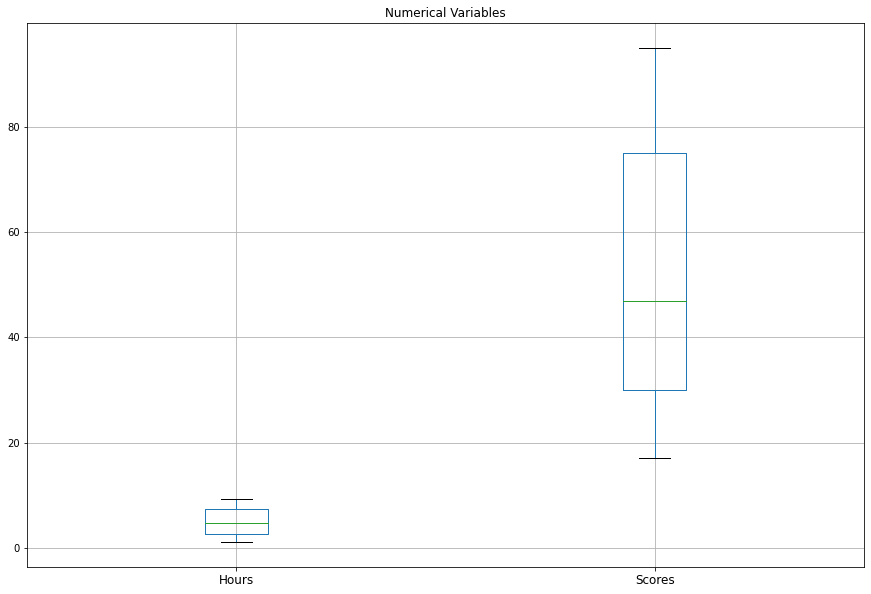

In [9]:
plt.figure(figsize=(15,10))

df.boxplot()
plt.title('Numerical Variables', fontsize = 12)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.show()

> From the boxplot, we can infere that there are no outliers present in the dataset

We can also verify the presence of outliers using metrics

Detection of outliers using IQR method:

In [10]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


> Hence we can confirm that there are no outliers present in the given dataset

# Visualization of the data

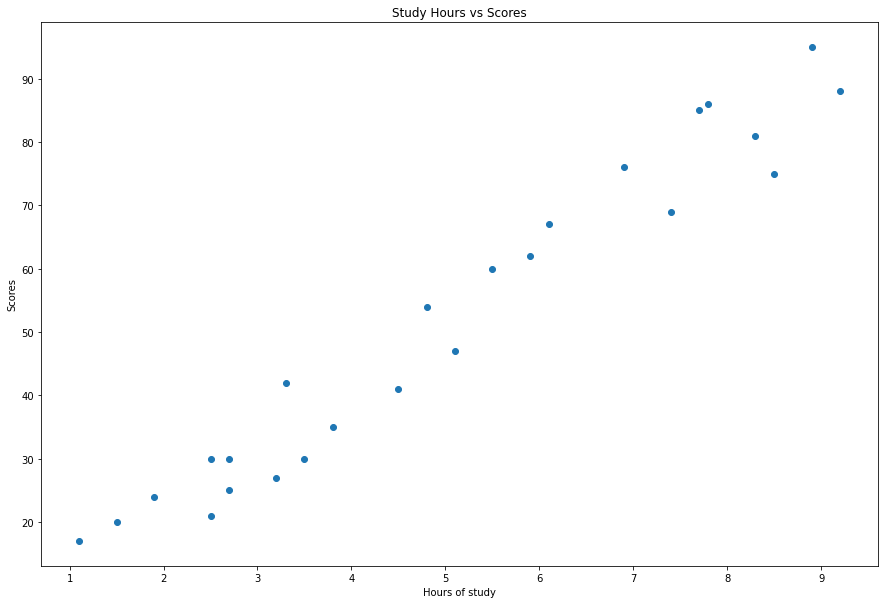

In [11]:
# Hours Vs Scores
plt.figure(figsize=(15,10))
plt.scatter(df['Hours'], df['Scores'])
plt.title('Study Hours vs Scores')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.show()

> The above scatter plot depicts a linear relationship between the variables "Hours" and "Scores" of students

> Since they share positive linear relationship, we can use bivariate regression to analyse their relationship or impact

# Importing additional required libraries

In [12]:
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

import statsmodels.api as sm

# Simple Linear Regression

In [13]:
lm = sm.OLS.from_formula('Scores~Hours', df)
result = lm.fit()

To get detailed information about the model, we can print the results using .summary()  method:

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           9.13e-17
Time:                        00:03:05   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:
The R-squared value obtained from this model is 95.3 which means that the above model explains 95.3% of the variation in the Scores.

# Prediction

Now let us try making some predictions using this model. First, we will set up a dataframe containing the Independent variable value for which we want to predict a response:

In [15]:
new_hour = pd.DataFrame([[1, 9.25]], columns=['Intercept', 'Hours'])
new_hour

,Intercept,Hours
0,1,9.25


In [16]:
new_result = result.predict(new_hour)
new_result

0    92.909855
dtype: float64

Technically the above output is the right prediction value, but maybe it would be good to have the confidence interval along with it.

In [17]:
def predict(res, new_hour):
    
    # Get the predicted values
    fit = pd.DataFrame(res.predict(new_hour), columns=['fit'])
    
    # Get the confidence interval for the model (and rename the columns to something a bit more useful)
    ci = res.conf_int().rename(columns={0: 'lower', 1: 'upper'})
    
    # Now a little bit of matrix multiplication to get the confidence intervals for the predictions
    ci = ci.T.dot(new_hour.T).T
    
    # And finally wrap up the confidence intervals with the predicted values
    return pd.concat([fit, ci], axis=1)

In [18]:
predict(result, new_hour)

,fit,lower,upper
0,92.909855,79.00564,106.81407


In [19]:
print("CONCLUSION: The predicted score if a student studies for 9.25 hours a day would be: ", new_result)

CONCLUSION: The predicted score if a student studies for 9.25 hours a day would be:  0    92.909855
dtype: float64
